<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

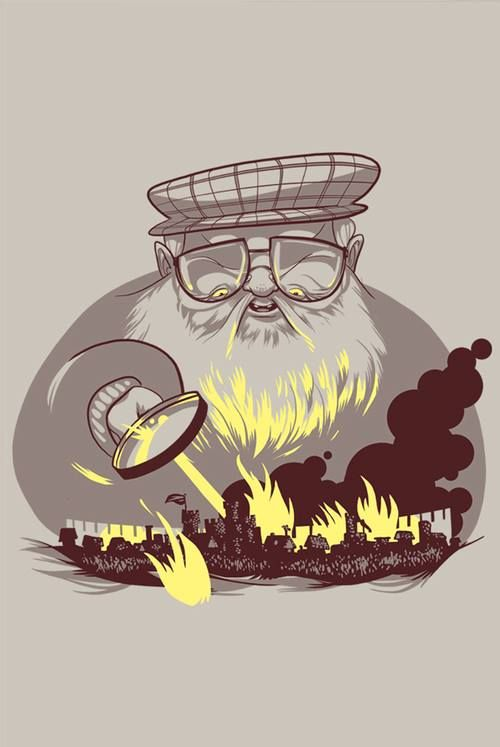

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 54.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
df_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
df_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
df_train[['name', 'house']]

,name,house
S.No,,
1,Viserys II Targaryen,NaN
2,Walder Frey,House Frey
3,Addison Hill,House Swyft
4,Aemma Arryn,House Arryn
5,Sylva Santagar,House Santagar
...,...,...
1553,Marwyn,NaN
1554,Masha Heddle,NaN
1555,Matthos Seaworth,House Seaworth


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

<Axes: xlabel='S.No'>

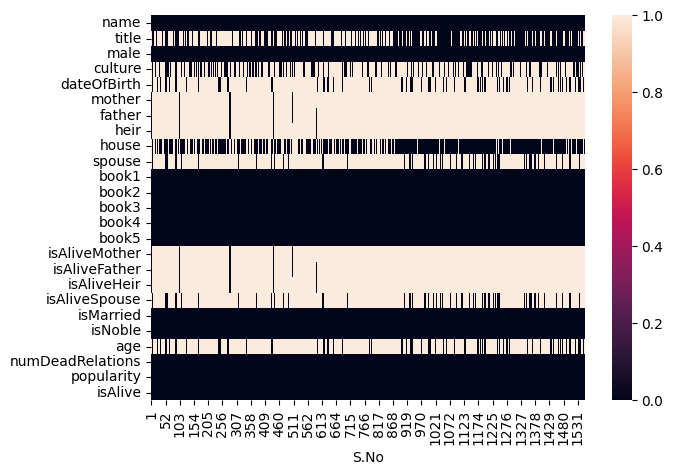

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())

In [ ]:
df_train.drop(columns = ['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse', 'isAliveSpouse'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  age               279 non-null    float64
 14  numDeadRelations  1557 non-null   int64  
 15  popularity        1557 non-null   float64
 16  isAlive           1557 non-null   int64  
dtype

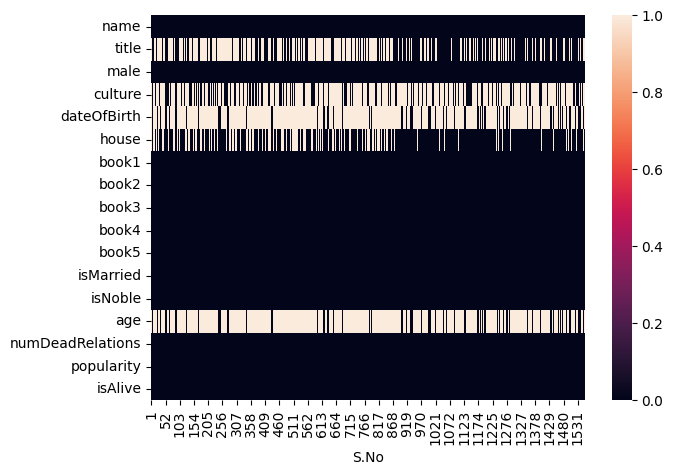

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())
df_train.info()

<Axes: xlabel='dateOfBirth', ylabel='Count'>

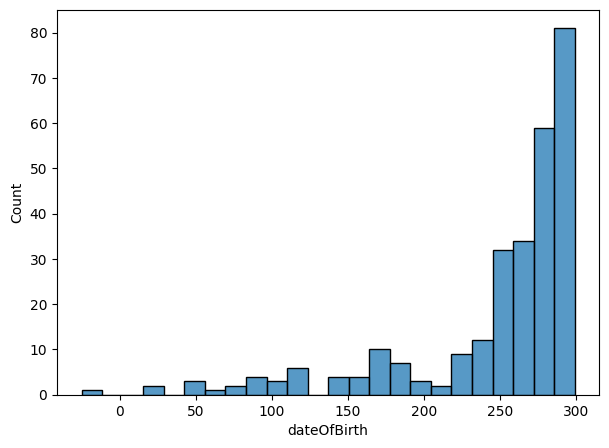

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df_train['dateOfBirth'].dropna())

In [ ]:
import numpy as np
median_birth = np.quantile(df_train['dateOfBirth'].dropna().values, q=0.5)
median_birth


272.0

In [ ]:
birth_mode = df_train['dateOfBirth'].mode()
mode_birth = np.float64(birth_mode)
mode_birth

<ipython-input-932-a8cc6c2b98e4>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mode_birth = np.float64(birth_mode)


286.0

In [ ]:
median_age = np.quantile(df_train['age'].dropna().values, q=0.5)
median_age

24.0

In [ ]:
age_mode = df_train['age'].mode()
mode_age = np.float64(age_mode)
mode_age

<ipython-input-934-42da91da544f>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mode_age = np.float64(age_mode)


100.0

In [ ]:
culture_mode = df_train['culture'].mode()
culture_mode

,culture
0,Northmen


In [ ]:
df_train['culture'] = df_train['culture'].fillna(culture_mode[0])

In [ ]:
df_train['dateOfBirth'] = df_train['dateOfBirth'].fillna(median_birth)

In [ ]:
df_train['age'] = df_train['age'].fillna(median_age)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   dateOfBirth       1557 non-null   float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  age               1557 non-null   float64
 14  numDeadRelations  1557 non-null   int64  
 15  popularity        1557 non-null   float64
 16  isAlive           1557 non-null   int64  
dtype

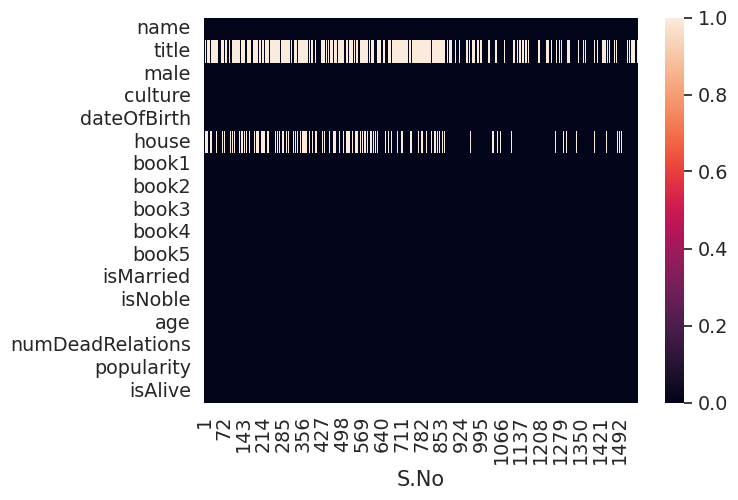

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isna().transpose())
df_train.info()

In [ ]:
def extract_second_name(name):
    words = name.split()
    return words[-1]
df_train['second_name'] = df_train['name'].apply(extract_second_name)
df_train['house'] = df_train['house'].fillna('House ' + df_train['second_name'])
df_train.drop(columns=['name', 'second_name'], inplace = True)
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1553
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              717 non-null    int64  
 2   culture           717 non-null    object 
 3   dateOfBirth       717 non-null    float64
 4   house             717 non-null    object 
 5   book1             717 non-null    int64  
 6   book2             717 non-null    int64  
 7   book3             717 non-null    int64  
 8   book4             717 non-null    int64  
 9   book5             717 non-null    int64  
 10  isMarried         717 non-null    int64  
 11  isNoble           717 non-null    int64  
 12  age               717 non-null    float64
 13  numDeadRelations  717 non-null    int64  
 14  popularity        717 non-null    float64
 15  isAlive           717 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


<Axes: xlabel='popularity', ylabel='Count'>

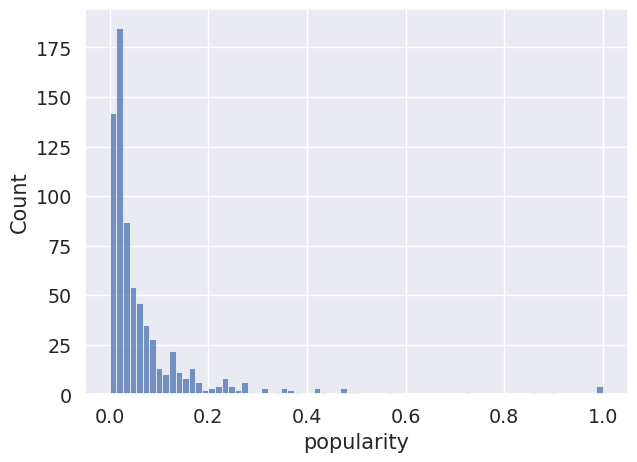

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df_train['popularity'].dropna())

In [ ]:
median_pop = np.quantile(df_train['popularity'].dropna().values, q=0.75)
median_pop

0.0735785953177257

In [ ]:
df_train['isPopular'] = (df_train['popularity'] > 0.2).astype(int)
df_train['isPopular'].value_counts()

,count
isPopular,
0,662
1,55


In [ ]:
df_train['boolDeadRelations'] = (df_train['numDeadRelations'] > 0).astype(int)
df_train['boolDeadRelations'].value_counts()

,count
boolDeadRelations,
0,677
1,40


In [ ]:
df_train['culture'].value_counts()

,count
culture,
Northmen,563
Valyrian,25
Ironborn,20
Dornish,13
Dothraki,12
Reach,12
Ghiscari,10
Rivermen,8
Valemen,8


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
def standardize_culture(column, cult):
    def replace_culture(value):
        value_lower = value.lower()
        for general, specific in cult.items():
            if value_lower in specific:
                return general
        return value

    return column.apply(replace_culture)

df_train['culture'] = standardize_culture(df_train['culture'], cult)
df_train['culture'] = df_train['culture'].replace(['Northmen', 'Northern mountain clans'], 'Northmen')
df_train['culture'] = df_train['culture'].replace(['Valemen', 'Vale mountain clans', 'Vale'], 'Vale')
culture_counts = df_train['culture'].value_counts()
df_train['culture'] = df_train['culture'].replace(culture_counts[culture_counts < 3].index, 'others_culture')
df_train['culture'].value_counts()

,count
culture,
Northmen,565
Valyrian,25
Ironborn,20
Dornish,16
Dothraki,12
Reach,12
Westermen,12
Vale,10
Ghiscari,10


In [ ]:
df_train[['culture', 'isAlive']].groupby(['culture'], as_index=False).mean()

,culture,isAlive
0,Astapori,0.250000
1,Braavosi,1.000000
2,Dornish,0.937500
3,Dothraki,0.750000
4,Free Folk,0.800000
5,Ghiscari,1.000000
6,Ironborn,0.800000
7,Northmen,0.773451
8,Reach,0.750000
9,Rivermen,0.625000


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
df_train['title'].unique()

array(['Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Blackcrown'

In [ ]:
df_train['title'] = np.where(df_train['title'].str.contains('Priest|Septa', case=False, regex=True), 'Religious', df_train['title'])
df_train['title'] = np.where(df_train['title'].str.contains('Queen|Princess', case=False, regex=True), 'Queen/Princess', df_train['title'])

df_train['title'] = np.where(df_train['title'].str.contains('King|Prince|Magister', case=False, regex=True), 'King/Prince', df_train['title'])

df_train['title'] = np.where(df_train['title'].str.contains('Lady|Lord', case=False, regex=True), 'Lord/Lady', df_train['title'])

df_train['title'] = np.where(df_train['title'].str.contains('Master|Steward|Castellan|Captain|Protector', case=False, regex=True), 'Master', df_train['title'])
df_train['title'] = np.where(df_train['title'].str.contains('Ser|Knight', case=False, regex=True), 'Military', df_train['title'])
df_train['title'] = np.where(df_train['title'].str.contains('Maester', case=False, regex=True), 'Maester', df_train['title'])
title_counts = df_train['title'].value_counts()
df_train['title'] = df_train['title'].replace(title_counts[title_counts < 3].index, 'others_title')
df_train['title'].value_counts()

,count
title,
Military,310
others_title,111
Lord/Lady,78
Maester,56
King/Prince,54
Master,21
Septon,16
Winterfell,15
Religious,11


In [ ]:
df_train[['title', 'isAlive']].groupby(['title'], as_index=False).mean()

,title,isAlive
0,Bitterbridge,0.666667
1,Bloodrider,0.666667
2,Brother,1.000000
3,Casterly Rock,0.000000
4,Cupbearer,1.000000
5,Duskendale,1.000000
6,Eyrie,0.333333
7,Harrenhal,0.333333
8,Khal,0.800000
9,King/Prince,0.481481


In [ ]:
df_train['title'].value_counts()

,count
title,
Military,310
others_title,111
Lord/Lady,78
Maester,56
King/Prince,54
Master,21
Septon,16
Winterfell,15
Religious,11


In [ ]:
house_counts = df_train['house'].value_counts()
df_train['house'] = df_train['house'].replace(house_counts[house_counts < 5].index, 'others_house')
df_train[['house', 'isAlive']].groupby(['house'], as_index=False).mean()

,house,isAlive
0,Alchemists' Guild,1.000000
1,Faith of the Seven,0.866667
2,House Arryn,0.200000
3,House Beesbury,0.600000
4,House Brax,0.400000
5,House Caswell,0.600000
6,House Crakehall,0.714286
7,House Estermont,1.000000
8,House Florent,1.000000
9,House Frey,0.739130


In [ ]:
df_train.drop(columns=['book2', 'book5'], inplace = True)

In [ ]:
df_train['isNoble'].value_counts()
df_train.drop(columns=['isNoble'], inplace = True)

In [ ]:
df_train.drop(columns=['popularity'], inplace = True)

In [ ]:
df_train.drop(columns=['numDeadRelations'], inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              717 non-null    object 
 1   male               717 non-null    int64  
 2   culture            717 non-null    object 
 3   dateOfBirth        717 non-null    float64
 4   house              717 non-null    object 
 5   book1              717 non-null    int64  
 6   book3              717 non-null    int64  
 7   book4              717 non-null    int64  
 8   isMarried          717 non-null    int64  
 9   age                717 non-null    float64
 10  isAlive            717 non-null    int64  
 11  isPopular          717 non-null    int64  
 12  boolDeadRelations  717 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 78.4+ KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

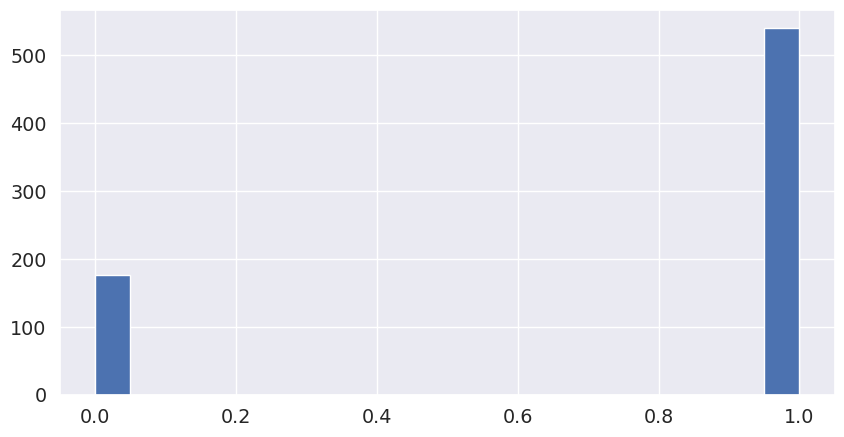

In [ ]:
plt.figure(figsize = (10, 5))

df_train['isAlive'].hist(density=False, bins=20)
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              717 non-null    object 
 1   male               717 non-null    int64  
 2   culture            717 non-null    object 
 3   dateOfBirth        717 non-null    float64
 4   house              717 non-null    object 
 5   book1              717 non-null    int64  
 6   book3              717 non-null    int64  
 7   book4              717 non-null    int64  
 8   isMarried          717 non-null    int64  
 9   age                717 non-null    float64
 10  isAlive            717 non-null    int64  
 11  isPopular          717 non-null    int64  
 12  boolDeadRelations  717 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 78.4+ KB


In [ ]:
categorical_columns = ['title', 'male', 'culture', 'house', 'isMarried', 'isPopular', 'boolDeadRelations']
categorical_features = df_train[categorical_columns]
categorical_features

,title,male,culture,house,isMarried,isPopular,boolDeadRelations
S.No,,,,,,,
2,Lord/Lady,1,Rivermen,House Frey,1,1,1
3,Military,1,Northmen,others_house,0,1,0
4,King/Prince,0,Northmen,House Arryn,1,0,0
5,others_title,0,Dornish,others_house,1,0,0
7,King/Prince,1,Valyrian,House Targaryen,1,1,0
...,...,...,...,...,...,...,...
1546,others_title,1,Northmen,House Tyrell,1,1,1
1548,Military,1,Vale,others_house,0,0,0
1549,Bloodrider,0,Dothraki,others_house,0,0,0


In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

for column in unprocessed_cat_features:
  df_train[column] = label_encoding.fit_transform(df_train[column])

df_train

,title,male,culture,dateOfBirth,house,book1,book3,book4,isMarried,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
2,11,1,9,208.0,9,1,1,1,1,97.0,1,1,1
3,14,1,7,272.0,25,0,0,1,0,24.0,1,1,0
4,9,0,7,82.0,2,0,0,0,1,23.0,0,0,0
5,20,0,2,276.0,25,0,0,1,1,29.0,1,0,0
7,9,1,12,183.0,17,0,0,0,1,26.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,20,1,7,256.0,18,1,1,1,1,49.0,1,1,1
1548,14,1,11,272.0,25,1,1,0,0,24.0,0,0,0
1549,1,0,3,272.0,25,1,1,1,0,24.0,1,0,0


In [ ]:
numerical_columns = ['dateOfBirth', 'age']
num_features = df_train[numerical_columns]
num_features

,dateOfBirth,age
S.No,,
2,208.0,97.0
3,272.0,24.0
4,82.0,23.0
5,276.0,29.0
7,183.0,26.0
...,...,...
1546,256.0,49.0
1548,272.0,24.0
1549,272.0,24.0


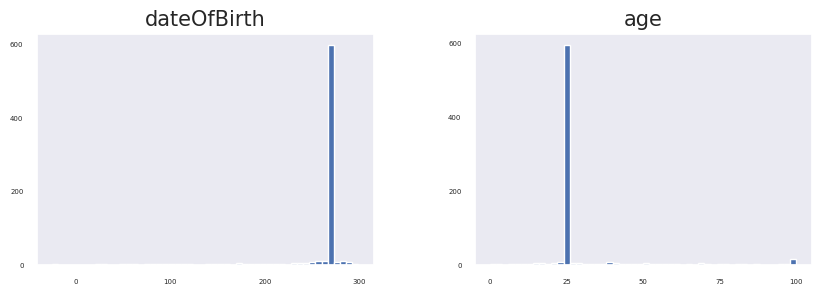

In [ ]:
num_features.hist(figsize=(10, 3), bins=50, xlabelsize=5, ylabelsize=5, grid=False);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

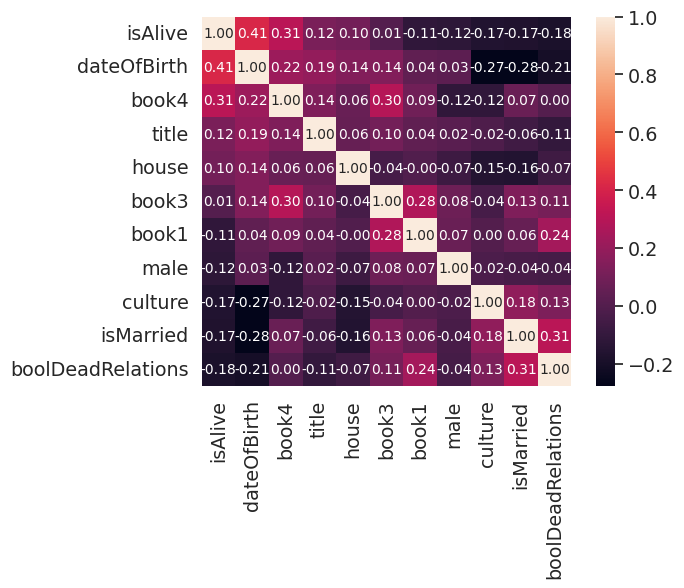

In [ ]:
corrmat = df_train.corr()
k = 11
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

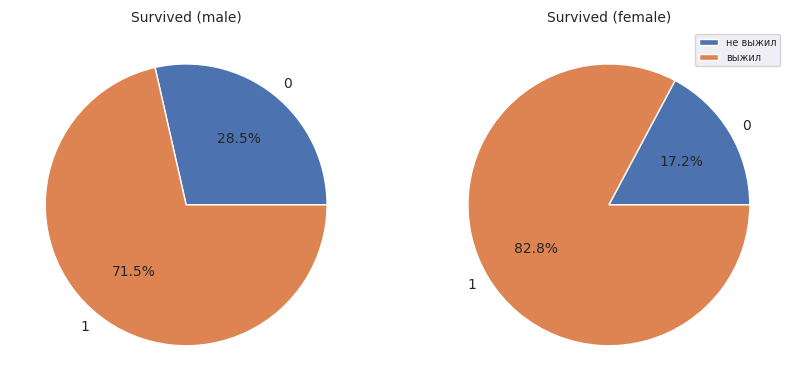

In [ ]:
data_1 = df_train[df_train['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df_train[df_train['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 1553
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              717 non-null    int64  
 1   male               717 non-null    int64  
 2   culture            717 non-null    int64  
 3   dateOfBirth        717 non-null    float64
 4   house              717 non-null    int64  
 5   book1              717 non-null    int64  
 6   book2              717 non-null    int64  
 7   book3              717 non-null    int64  
 8   book4              717 non-null    int64  
 9   isMarried          717 non-null    int64  
 10  age                717 non-null    float64
 11  isAlive            717 non-null    int64  
 12  isPopular          717 non-null    int64  
 13  boolDeadRelations  717 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 84.0 KB


ОБРАБОТКА ДАННЫХ

In [ ]:
df_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
df_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')

def extract_second_name(name):
    words = name.split()
    return words[-1]

def standardize_culture(column, cult):
    def replace_culture(value):
        value_lower = value.lower()
        for general, specific in cult.items():
            if value_lower in specific:
                return general
        return value

    return column.apply(replace_culture)

def TransformData(data):
  data.drop(columns = ['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'spouse', 'isAliveSpouse'], inplace=True)
  median_birth = np.quantile(data['dateOfBirth'].dropna().values, q=0.5)
  median_age = np.quantile(data['age'].dropna().values, q=0.5)
  culture_mode = data['culture'].mode()

  data['culture'] = data['culture'].fillna(culture_mode[0])

  title_mode = data['title'].mode()
  data['title'] = data['title'].fillna(title_mode[0])

  data['dateOfBirth'] = data['dateOfBirth'].fillna(median_birth)
  data['age'] = data['age'].fillna(median_age)
  data['second_name'] = data['name'].apply(extract_second_name)
  data['house'] = data['house'].fillna('House ' + data['second_name'])
  data.drop(columns=['name', 'second_name'], inplace = True)

  data.dropna(inplace=True)

  median_pop = np.quantile(data['popularity'].dropna().values, q=0.75)
  data['isPopular'] = (data['popularity'] > 0.2).astype(int)
  data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

  data['culture'] = standardize_culture(data['culture'], cult)
  data['culture'] = data['culture'].replace(['Northmen', 'Northern mountain clans'], 'Northmen')
  data['culture'] = data['culture'].replace(['Valemen', 'Vale mountain clans', 'Vale'], 'Vale')
  culture_counts = data['culture'].value_counts()
  data['culture'] = data['culture'].replace(culture_counts[culture_counts < 3].index, 'others_culture')

  data['title'] = np.where(data['title'].str.contains('Priest|Septa', case=False, regex=True), 'Religious', data['title'])
  data['title'] = np.where(data['title'].str.contains('Queen|Princess', case=False, regex=True), 'Queen/Princess', data['title'])

  data['title'] = np.where(data['title'].str.contains('King|Prince|Magister', case=False, regex=True), 'King/Prince', data['title'])

  data['title'] = np.where(data['title'].str.contains('Lady|Lord', case=False, regex=True), 'Lord/Lady', data['title'])

  data['title'] = np.where(data['title'].str.contains('Master|Steward|Castellan|Captain|Protector', case=False, regex=True), 'Master', data['title'])
  data['title'] = np.where(data['title'].str.contains('Ser|Knight', case=False, regex=True), 'Military', data['title'])
  data['title'] = np.where(data['title'].str.contains('Maester', case=False, regex=True), 'Maester', data['title'])

  title_counts = data['title'].value_counts()
  data['title'] = data['title'].replace(title_counts[title_counts < 3].index, 'others_title')

  house_counts = data['house'].value_counts()
  data['house'] = data['house'].replace(house_counts[house_counts < 5].index, 'others_house')
  data.drop(columns=['book5', 'book2'], inplace = True)
  data.drop(columns=['isNoble'], inplace = True)
  data.drop(columns=['popularity'], inplace = True)
  data.drop(columns=['numDeadRelations'], inplace = True)

  categorical_columns = ['title', 'male', 'culture', 'house', 'isMarried', 'isPopular', 'boolDeadRelations']
  categorical_features = data[categorical_columns]

  unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
  label_encoding = LabelEncoder()

  for column in unprocessed_cat_features:
    data[column] = label_encoding.fit_transform(data[column])


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
df_train['type'] = 'train'
df_test['type'] = 'test'
df_test['isAlive'] = 0
data = pd.concat([df_train, df_test])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1946 non-null   object 
 1   title             938 non-null    object 
 2   male              1946 non-null   int64  
 3   culture           677 non-null    object 
 4   dateOfBirth       433 non-null    float64
 5   mother            21 non-null     object 
 6   father            26 non-null     object 
 7   heir              23 non-null     object 
 8   house             1519 non-null   object 
 9   spouse            276 non-null    object 
 10  book1             1946 non-null   int64  
 11  book2             1946 non-null   int64  
 12  book3             1946 non-null   int64  
 13  book4             1946 non-null   int64  
 14  book5             1946 non-null   int64  
 15  isAliveMother     21 non-null     float64
 16  isAliveFather     26 non-null     float64
 17  

In [ ]:
TransformData(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1946 non-null   int64  
 1   male               1946 non-null   int64  
 2   culture            1946 non-null   int64  
 3   dateOfBirth        1946 non-null   float64
 4   house              1946 non-null   int64  
 5   book1              1946 non-null   int64  
 6   book3              1946 non-null   int64  
 7   book4              1946 non-null   int64  
 8   isMarried          1946 non-null   int64  
 9   age                1946 non-null   float64
 10  isAlive            1946 non-null   int64  
 11  type               1946 non-null   object 
 12  isPopular          1946 non-null   int64  
 13  boolDeadRelations  1946 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 228.0+ KB


In [ ]:
#TransformData(df_test) если отдельно анализировать test, то 0.75 - читерство
df_train = data[data['type'] == 'train'].drop(columns=['type'])
df_test = data[data['type'] == 'test'].drop(columns=['type'])

In [ ]:
df_test.drop(columns=['isAlive'], inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    int64  
 1   male               389 non-null    int64  
 2   culture            389 non-null    int64  
 3   dateOfBirth        389 non-null    float64
 4   house              389 non-null    int64  
 5   book1              389 non-null    int64  
 6   book3              389 non-null    int64  
 7   book4              389 non-null    int64  
 8   isMarried          389 non-null    int64  
 9   age                389 non-null    float64
 10  isPopular          389 non-null    int64  
 11  boolDeadRelations  389 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.5 KB


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = df_train.drop(columns=['isAlive']).values
y = df_train['isAlive'].values
data = df_train.drop(columns=['isAlive'])
ans = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=3000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_boost_classifier = AdaBoostClassifier(algorithm='SAMME')

# Шаг 2. обучение модели
ada_boost_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada_boost_classifier = ada_boost_classifier.predict(X_test)

accuracy_ada_boost_classifier = accuracy_score(y_test, y_pred_ada_boost_classifier)

print("Accuracy : %.4f" % accuracy_ada_boost_classifier) #best

Accuracy : 0.8173


In [ ]:
# Шаг 1. создание модели
random_forest_classifier = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)

In [ ]:
gaussian_process_classifier = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
k_neighbors_classifier = KNeighborsClassifier()
svc = SVC()
decision_tree_classifier = DecisionTreeClassifier()

gaussian_process_classifier.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
k_neighbors_classifier.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

y_pred_gaussian_process_classifier = gaussian_process_classifier.predict(X_test)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)
y_pred_k_neighbors_classifier = k_neighbors_classifier.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_decision_tree_classifier = decision_tree_classifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных

y_pred_random_forest_classifier = random_forest_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_random_forest_classifier = accuracy_score(y_test, y_pred_random_forest_classifier)

print("Accuracy : %.4f" % accuracy_random_forest_classifier)

Accuracy : 0.7724


In [ ]:
accuracy_gaussian_process_classifier = accuracy_score(y_test, y_pred_gaussian_process_classifier)
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
accuracy_k_neighbors_classifier = accuracy_score(y_test, y_pred_k_neighbors_classifier)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_decision_tree_classifier = accuracy_score(y_test, y_pred_decision_tree_classifier)

In [ ]:
print("Accuracy : %.4f" % accuracy_gaussian_process_classifier)
print("Accuracy : %.4f" % accuracy_gaussian_nb)
print("Accuracy : %.4f" % accuracy_k_neighbors_classifier)
print("Accuracy : %.4f" % accuracy_svc)
print("Accuracy : %.4f" % accuracy_decision_tree_classifier)


Accuracy : 0.8269
Accuracy : 0.7885
Accuracy : 0.8077
Accuracy : 0.7981
Accuracy : 0.7853


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.35MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
logistic_regression = LogisticRegression(max_iter=3000)
# Шаг 2. обучение модели
logistic_regression.fit(data, ans)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(df_test)

In [ ]:
y_pred_series = pd.Series(y_pred, index=df_test.index)
y_pred_series

,0
S.No,
1558,0
1559,1
1560,1
1561,0
1562,1
...,...
1942,0
1943,1
1944,1


In [ ]:
submission['isAlive'] = y_pred_series
submission['isAlive'].value_counts()

,count
isAlive,
1,305
0,84


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission17.csv", index=False)